In [1]:
import os
import pandas as pd
import numpy as np
import random as rnd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [4]:
DATA_PATH ='C:\\Boot Camp\Homework\\final-project\\data\\Loan_status_2007-2020Q3.gzip'

In [5]:
loans = pd.read_csv(DATA_PATH)
loans.head()

C:\Users\narje\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [6]:
loans.count()

Unnamed: 0                                    2925493
id                                            2925493
loan_amnt                                     2925492
funded_amnt                                   2925492
funded_amnt_inv                               2925492
                                               ...   
hardship_loan_status                           143411
orig_projected_additional_accrued_interest     179240
hardship_payoff_balance_amount                 182076
hardship_last_payment_amount                   182076
debt_settlement_flag                          2925492
Length: 142, dtype: int64

In [7]:
#create sample data for first 500 rows just to check it
sample=loans.head(500)

In [8]:
sample.to_csv('C:\\Boot Camp\Homework\\final-project\\data\\sample_main_data.csv', index=False)

In [9]:
loans.columns

Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_length', 'hardship_dpd', 'hardship_loan_status',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag'],
      dtype='object', length=142)

In [24]:
#predict the loan_status variable. What are the value counts for this variable
loans["loan_status"].value_counts(dropna=False)

Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
NaN                                                          1
Name: loan_status, dtype: int64

In [25]:
#keep the loans with status "Fully Paid" or "Charged Off"
ploans = loans.loc[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])]


In [26]:
ploans.count()

Unnamed: 0                                    1860331
id                                            1860331
loan_amnt                                     1860331
funded_amnt                                   1860331
funded_amnt_inv                               1860331
                                               ...   
hardship_loan_status                            12684
orig_projected_additional_accrued_interest      19213
hardship_payoff_balance_amount                  22049
hardship_last_payment_amount                    22049
debt_settlement_flag                          1860331
Length: 142, dtype: int64

In [27]:
#Number of loan statuses with Fully paid or Charged off (we want to keep it as label of data for ML section)
ploans["loan_status"].value_counts(dropna=False)

Fully Paid     1497783
Charged Off     362548
Name: loan_status, dtype: int64

In [28]:
#percentage of each value
ploans["loan_status"].value_counts(normalize=True)

Fully Paid     0.805116
Charged Off    0.194884
Name: loan_status, dtype: float64

In [29]:
#calculate the percentage of missing data for each feature
missing_values_mean = ploans.isnull().mean().sort_values(ascending=False)

In [30]:
missing_values_mean.head(20)

next_pymnt_d                                  1.000000
hardship_loan_status                          0.993182
deferral_term                                 0.993176
hardship_status                               0.993176
hardship_dpd                                  0.993176
hardship_length                               0.993176
payment_plan_start_date                       0.993176
hardship_end_date                             0.993176
hardship_start_date                           0.993176
hardship_type                                 0.993176
hardship_reason                               0.993175
orig_projected_additional_accrued_interest    0.989672
hardship_last_payment_amount                  0.988148
hardship_amount                               0.988148
hardship_payoff_balance_amount                0.988148
sec_app_revol_util                            0.969010
revol_bal_joint                               0.968484
sec_app_mort_acc                              0.968483
sec_app_fi

Text(0, 0.5, 'Feature count')

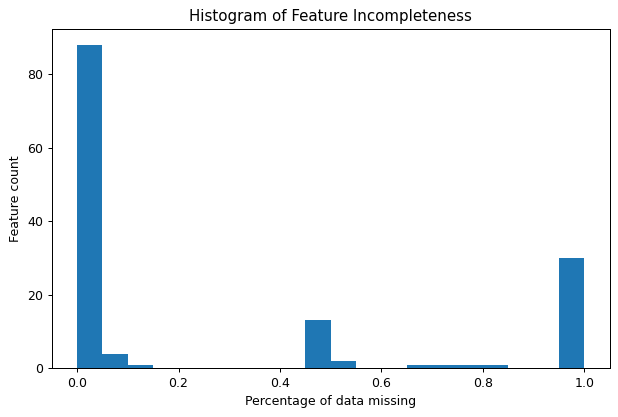

In [33]:
#visualize the distribution of missing data percentages
plt.figure(figsize=(8,5), dpi=90)
missing_values_mean.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Percentage of data missing')
plt.ylabel('Feature count')

In [51]:
# store all variables missing more than 30% data
drop_values_mean=sorted(list(missing_values_mean[missing_values_mean>0.3].index))
len(drop_values_mean)

49

In [52]:
drop_values_mean

['all_util',
 'annual_inc_joint',
 'deferral_term',
 'dti_joint',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'next_pymnt_d',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'orig_projected_additional_accrued_interest',
 'payment_plan_start_date',
 'revol_bal_joint',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_earliest_cr_line',
 'sec_app_fico_range_high',
 'sec_app_fico_range_low',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_num_rev_accts',
 'sec_app_

In [35]:
# Drop features
ploans.drop(columns=drop_values_mean, inplace=True, axis=1)

C:\Users\narje\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
ploans.shape

(1860331, 93)

In [50]:
ploans.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [46]:
#keep needed features after checking Data Dictionary
keep_list=['loan_amnt','term','int_rate', 'installment', 'grade', 'sub_grade','emp_length', 'home_ownership', 'annual_inc','issue_d', 'loan_status','pymnt_plan','addr_state', 'dti', 'earliest_cr_line','fico_range_low', 'fico_range_high', 'open_acc', 'revol_bal', 'revol_util','total_acc','total_pymnt','total_rec_late_fee','last_pymnt_d','application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal','chargeoff_within_12_mths','mort_acc','num_il_tl','pub_rec_bankruptcies','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_il_high_credit_limit', 'hardship_flag', 'debt_settlement_flag','pub_rec']

#keep_list = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']
print("Keep features: ", len(keep_list))

Keep features:  39


In [48]:
ml_loans=ploans

In [49]:
drop_list = [col for col in ml_loans.columns if col not in keep_list]
drop_list

['id',
 'emp_title',
 'verification_status',
 'purpose',
 'title',
 'zip_code',
 'initial_list_status']

In [43]:
ploans.drop(labels=drop_list, axis=1, inplace=True)
ploans.shape

C:\Users\narje\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1860331, 31)